<a href="https://colab.research.google.com/github/cameronliddle/CrashData/blob/main/CrashData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/CrashData/Traffic_Crashes_-_Crashes.csv')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Classification Report:
                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00        30
   INCAPACITATING INJURY       0.17      0.05      0.07       672
 NO INDICATION OF INJURY       0.93      0.98      0.95     49935
NONINCAPACITATING INJURY       0.44      0.30      0.36      3297
   REPORTED, NOT EVIDENT       0.12      0.03      0.04      1856

                accuracy                           0.90     55790
               macro avg       0.33      0.27      0.29     55790
            weighted avg       0.86      0.90      0.88     55790

Confusion Matrix:
[[    0     2     7    20     1]
 [    3    32   355   262    20]
 [    5    56 48968   671   235]
 [    8    77  2110   997   105]
 [    1    21  1443   341    50]]


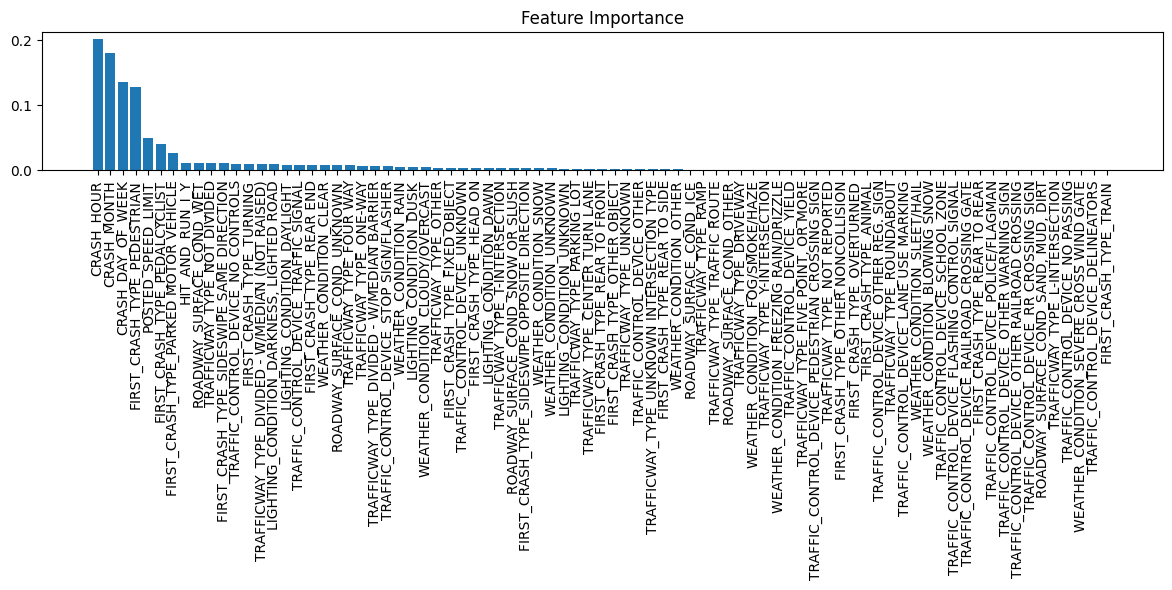

In [ ]:
features = [
    'POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
    'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFIC_CONTROL_DEVICE',
    'FIRST_CRASH_TYPE', 'ROADWAY_SURFACE_COND', 'TRAFFICWAY_TYPE', 'HIT_AND_RUN_I'
]
target = 'MOST_SEVERE_INJURY'

data = data.dropna(subset=features + [target])
X = pd.get_dummies(data[features], drop_first=True)

scaler = StandardScaler()
numerical_features = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=len(y_train) / y_train.value_counts(), random_state=42)


In [ ]:
# SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest Classifier with balanced classes
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00        30
   INCAPACITATING INJURY       0.11      0.07      0.08       672
 NO INDICATION OF INJURY       0.93      0.94      0.94     49935
NONINCAPACITATING INJURY       0.32      0.33      0.33      3297
   REPORTED, NOT EVIDENT       0.08      0.06      0.07      1856

                accuracy                           0.87     55790
               macro avg       0.29      0.28      0.28     55790
            weighted avg       0.86      0.87      0.86     55790

Confusion Matrix:
[[    0     5     6    17     2]
 [    3    45   324   260    40]
 [    6   192 47099  1615  1023]
 [    7   136  1837  1094   223]
 [    1    47  1299   399   110]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

class_weights = {
    'FATAL': 10,  # Increase these values as needed
    'INCAPACITATING INJURY': 5,
    'NO INDICATION OF INJURY': 1,
    'NONINCAPACITATING INJURY': 2,
    'REPORTED, NOT EVIDENT': 3,
}

model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight={'FATAL': 10, 'INCAPACITATING INJURY': 5,
                                     'NO INDICATION OF INJURY': 1,
                                     'NONINCAPACITATING INJURY': 2,
                                     'REPORTED, NOT EVIDENT': 3},
                       random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='f1_macro')
grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

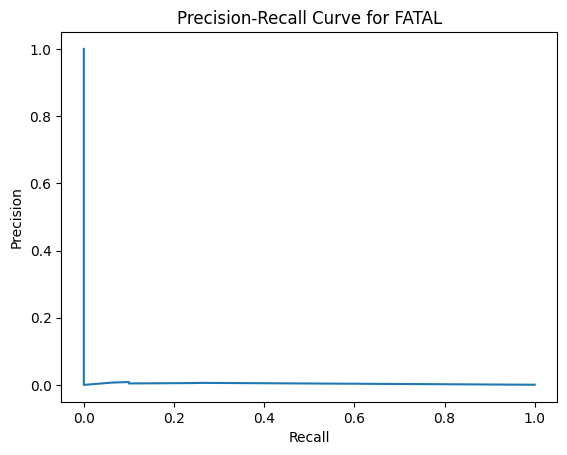

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example for "FATAL"
y_proba = model.predict_proba(X_test)[:, 0]  # Probabilities for class 0 (FATAL)
precision, recall, thresholds = precision_recall_curve(y_test == 'FATAL', y_proba)

plt.plot(recall, precision)
plt.title('Precision-Recall Curve for FATAL')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Verify the mapping of classes
print("Class Mapping:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")


Class Mapping:
0: FATAL
1: INCAPACITATING INJURY
2: NO INDICATION OF INJURY
3: NONINCAPACITATING INJURY
4: REPORTED, NOT EVIDENT


In [ ]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight (optional)
scale_pos_weight = len(y_train_resampled) / y_train_resampled.value_counts()['FATAL']

# Train the XGBoost model
model_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
model_xgb.fit(X_train_resampled, y_train_resampled_encoded)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:03:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

PR-AUC for FATAL (XGBoost): 0.00838258753741035


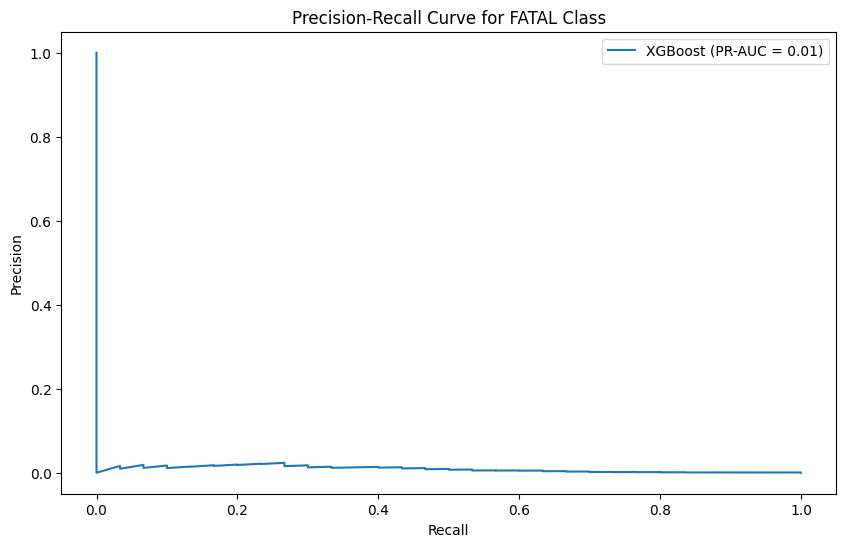

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities for the FATAL class (encoded as 0)
fatal_class_index = label_encoder.transform(['FATAL'])[0]
y_proba_xgb = model_xgb.predict_proba(X_test)[:, fatal_class_index]

# Precision-Recall curve for FATAL
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test_encoded == fatal_class_index, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

print(f"PR-AUC for FATAL (XGBoost): {pr_auc_xgb}")

# Plot Precision-Recall curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(recall_xgb, precision_xgb, label=f"XGBoost (PR-AUC = {pr_auc_xgb:.2f})")
plt.title('Precision-Recall Curve for FATAL Class')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


In [ ]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_resampled, y_train_resampled_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_test_encoded = label_encoder.transform(y_test)  # Encode y_test
y_proba = model_xgb.predict_proba(X_test)

# Precision-Recall Curve for the FATAL class
fatal_class_index = label_encoder.transform(['FATAL'])[0]
precision, recall, thresholds = precision_recall_curve(y_test_encoded == fatal_class_index, y_proba[:, fatal_class_index])

from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(f"PR-AUC for FATAL: {pr_auc}")


PR-AUC for FATAL: 0.00838258753741035
